In [106]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
from jira import JIRA
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

In [25]:
jira = JIRA('https://jira.sonarsource.com/')

In [94]:
issue_fields = ['issuetype',
 'customfield_12130',
 'customfield_11041',
 'customfield_12132',
 'customfield_12131',
 'project',
 'customfield_12134',
 'customfield_12530',
 'fixVersions',
 'customfield_12133',
 'customfield_12136',
 'customfield_12532',
 'resolution',
 'customfield_10431',
 'customfield_12135',
 'customfield_12531',
 'customfield_12138',
 'customfield_10432',
 'customfield_12534',
 'customfield_12137',
 'customfield_10433',
 'customfield_12533',
 'customfield_11832',
 'customfield_11831',
 'customfield_11833',
 'resolutiondate',
 'workratio',
 'lastViewed',
 'watches',
 'created',
 'customfield_11032',
 'customfield_11033',
 'priority',
 'customfield_11630',
 'customfield_11233',
 'customfield_11036',
 'customfield_11830',
 'labels',
 'customfield_11631',
 'customfield_11038',
 'customfield_10930',
 'customfield_11347',
 'customfield_10931',
 'customfield_10932',
 'versions',
 'issuelinks',
 'assignee',
 'updated',
 'status',
 'components',
 'customfield_12031',
 'customfield_11140',
 'customfield_12030',
 'customfield_12033',
 'customfield_11141',
 'description',
 'customfield_12032',
 'customfield_12034',
 'customfield_12430',
 'customfield_11344',
 'customfield_11343',
 'customfield_10530',
 'customfield_11345',
 'customfield_10730',
 'customfield_11337',
 'customfield_11930',
 'customfield_11139',
 'customfield_11338',
 'summary',
 'creator',
 'subtasks',
 'customfield_11130',
 'customfield_11131',
 'reporter',
 'customfield_11132',
 'customfield_11133',
 'customfield_10243',
 'customfield_11335',
 'customfield_11334',
 'customfield_11730',
 'customfield_10434',
 'customfield_12536',
 'customfield_12535',
 'customfield_12139',
 'environment',
 'customfield_12538',
 'customfield_10437',
 'customfield_12537',
 'customfield_10438',
 'duedate',
 'votes',
 #'__module__',
 #'__dict__',
 #'__weakref__',
 #'__doc__'
       ]

| Field          | Description                                                     |
|----------------|-----------------------------------------------------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version |
| issuetype      | Type of issue                                                   |
| project        | The project the issue belongs to                                |
| resolution     | The resolution of the issue                                     |
| resolutiondate | The date the issue was resolved                                 |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  |
| lastViewed     | The date at which the issue was last viewed                     |
| watches        | Users watching the issue                                        |
| created        | The date of the creation of the issue                           |
| priority       | Priority assigned to the issue                                  |
| labels         | Labels assigned to the issue                                    |
| versions       | The versions affected by the issue                              |
| assignee       | The user the issue is assigned to                               |
| status         | The status of the issue                                         |
| description    | The description of the issue                                    |
| summary        | A summary of the issue reported                                 |
| creator        | The user that created the issue                                 |
| subtasks       | The subtasks of the issue                                       |
| reporter       | The user who reported the issue. May be the same as the creator |
| duedate        | The date the issue is due to be resolved                        |

#download all issues
size = 100
initial = 0
issue_tuples = []
all_issues = []
while True:
    start= initial*size
    issues = jira.search_issues('project=SONAR',  start,size)
    all_issues = all_issues + issues
    if len(issues) == 0:
        break
    initial += 1

#create tuples for dataframe creation
for issue in all_issues:
    values = []
    values.append(issue.key)
    values.append(issue.id)
    for field in issue_fields:
        values.append(getattr(issue.fields, field))
    issue_tuples.append(values)

In [233]:
issues_df = pd.DataFrame(issue_tuples, columns=(["issue_key", "issue_id"] + issue_fields))
issues_df

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,...,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],None,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],None,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],2020-10-05,0
3,SONAR-13909,97858,New Feature,P3-Medium,0|i0dk8v:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],2020-10-05,0
4,SONAR-13907,97855,Improvement,P3-Medium,0|i0dk87:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],2020-10-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11502,SONAR-5,30985,New Feature,None,0|i0387z:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0
11503,SONAR-4,29449,Bug,None,0|i02zzj:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0
11504,SONAR-3,32314,New Feature,None,0|i03fqn:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0
11505,SONAR-2,29663,New Feature,None,0|i0312n:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0


In [121]:
def extract_features(df, field, fields_to_extract):
    for fte in fields_to_extract:
        df[f"{field}_{fte}"] = issues_df[field].apply(lambda x: getattr(x,fte) if x else None)
    return df

In [234]:
extract_features(issues_df, "issuetype", ["id", "name"])
extract_features(issues_df, "priority", ["id", "name"])
extract_features(issues_df, "assignee", ["key", "name"])
extract_features(issues_df, "reporter", ["key", "name"])
extract_features(issues_df, "creator", ["key", "name"])
extract_features(issues_df, "status", ["id", "name"])
extract_features(issues_df, "resolution", ["id", "name"])
extract_features(issues_df, "votes", ["votes"])

issues_df['created'] = pd.to_datetime(issues_df['created'],errors='coerce', utc=True)
issues_df['resolutiondate'] = pd.to_datetime(issues_df['resolutiondate'],errors='coerce', utc=True)
issues_df['updated'] = pd.to_datetime(issues_df['updated'],errors='coerce', utc=True)
issues_df['duedate'] = pd.to_datetime(issues_df['duedate'],errors='coerce', utc=True)

In [129]:
issues_df.to_csv("csv/issues.csv")
issues_df = pd.read_csv("csv/issues.csv", index_col=0)
issues_df

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,...,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,votes_votes,resolution_id,resolution_name
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,...,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,0,NaN,NaN
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,...,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,0,NaN,NaN
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,...,julien.lancelot,evgeny.mandrikov,evgeny.mandrikov,evgeny.mandrikov,evgeny.mandrikov,10002,In Review,0,NaN,NaN
3,SONAR-13909,97858,New Feature,P3-Medium,0|i0dk8v:,No root cause identified,NaN,SONAR,Not captured yet,NaN,...,julien.lancelot,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,10002,In Review,0,NaN,NaN
4,SONAR-13907,97855,Improvement,P3-Medium,0|i0dk87:,No root cause identified,NaN,SONAR,Not captured yet,NaN,...,julien.lancelot,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,10002,In Review,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11502,SONAR-5,30985,New Feature,NaN,0|i0387z:,NaN,NaN,SONAR,NaN,NaN,...,julien.lancelot,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,0,1.0,Fixed
11503,SONAR-4,29449,Bug,NaN,0|i02zzj:,NaN,NaN,SONAR,NaN,NaN,...,cedric.munger,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,0,5.0,Cannot Reproduce
11504,SONAR-3,32314,New Feature,NaN,0|i03fqn:,NaN,NaN,SONAR,NaN,NaN,...,cedric.munger,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,0,1.0,Fixed
11505,SONAR-2,29663,New Feature,NaN,0|i0312n:,NaN,NaN,SONAR,NaN,NaN,...,cedric.munger,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,0,1.0,Fixed


### Extract versions

In [202]:
def extract_versions(all_issues, version_field, prefix):
    values = []
    for issue in all_issues:
        for version in getattr(issue.fields, version_field):
            values.append((issue.id,version.name,version.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_name", f"{prefix}_id"])

In [203]:
issues_fixversions = extract_versions(all_issues, "fixVersions", "fixVersion")
issues_fixversions.to_csv("csv/issues_fixversions.csv")
issues_fixversions = pd.read_csv("csv/issues_fixversions.csv", index_col=0)
issues_fixversions

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342
...,...,...,...
8514,30985,1.1,11537
8515,29449,1.1,11537
8516,32314,1.1,11537
8517,29663,1.1,11537


In [204]:
issues_versions = extract_versions(all_issues, "versions", "version")
issues_versions.to_csv("csv/issues_versions.csv")
issues_versions = pd.read_csv("csv/issues_versions.csv", index_col=0)
issues_versions

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404
...,...,...,...
3330,29492,1.0.2,11536
3331,29496,1.0.2,11536
3332,29480,1.1,11537
3333,29473,1.5,11545


### Extract labels

In [205]:
def extract_labels(all_issues, field, column):
    values = []
    for issue in all_issues:
        for value in getattr(issue.fields, field):
            values.append((issue.id, value))
    return pd.DataFrame(values, columns=["issue_id", column])

In [206]:
issues_labels = extract_labels(all_issues, "labels", "label")
issues_labels.to_csv("issues_labels.csv")
issues_labels = pd.read_csv("issues_labels.csv", index_col=0)
issues_labels

,issue_id,label
0,97868,trello:5f71b7467b498d57987bfe0a
1,97813,GitHubIntegration
2,97813,usability-testing-findings
3,97673,JenkinsIntegration
4,97673,usability-testing-findings
...,...,...
2978,31244,tendency
2979,27938,treemap
2980,27963,drilldown
2981,28399,drilldown


### Extract subtasks

In [207]:
def extract_subtasks(all_issues, field, prefix):
    values = []
    for issue in all_issues:
        for subtask in getattr(issue.fields, field):
            values.append((issue.id,subtask.key,subtask.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_key", f"{prefix}_id"])

In [208]:
issues_substaks = extract_subtasks(all_issues, "subtasks", "subtask")
issues_substaks.to_csv("csv/issues_subtasks.csv")
issues_substaks = pd.read_csv("csv/issues_subtasks.csv", index_col=0)
issues_substaks

,issue_id,subtask_key,subtask_id
0,97393,SONAR-13858,97372
1,97393,SONAR-13868,97394
2,97387,SONAR-13863,97388
3,97387,SONAR-13864,97389
4,97387,SONAR-13865,97390
...,...,...,...
846,30992,SONAR-2589,30847
847,30992,SONAR-2590,28458
848,30992,SONAR-2591,30079
849,30992,SONAR-2592,31904


## Field analysis

### Workratio

<AxesSubplot:xlabel='workratio'>

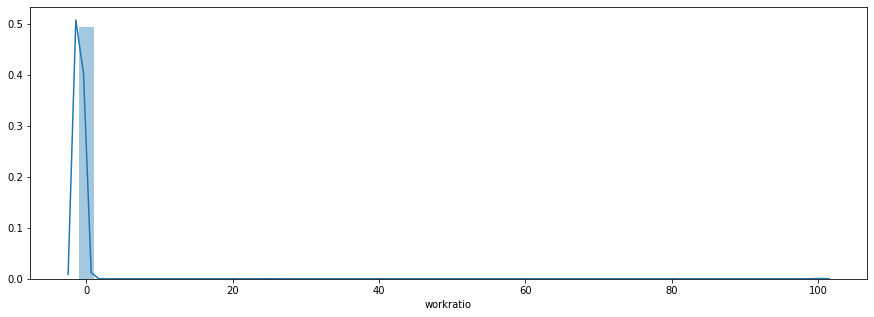

In [209]:
sns.distplot(issues_df.workratio)

### IssueType

<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

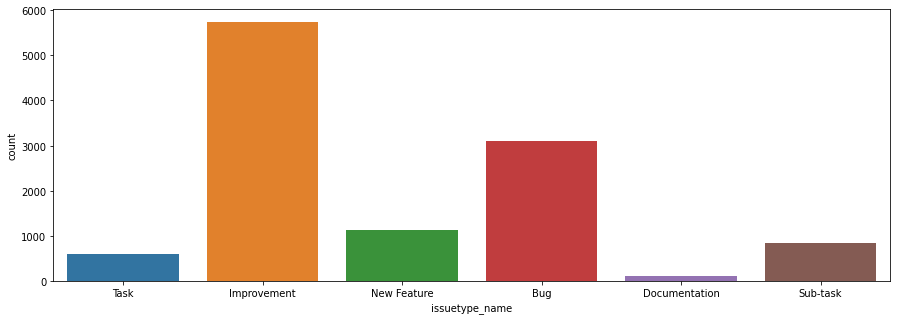

In [210]:
sns.countplot(x="issuetype_name", data=issues_df[["issue_id", "issuetype_name"]])

### Resolution

In [211]:
issues_df.resolution_name.unique()

array([nan, 'Fixed', 'Duplicate', "Won't Do", "Won't Fix", 'Done',
       'Not an issue', 'Canceled', 'Cannot Reproduce', 'Moved To GitHub',
       'Incomplete', 'Not A Bug', 'UNRESOLVED'], dtype=object)

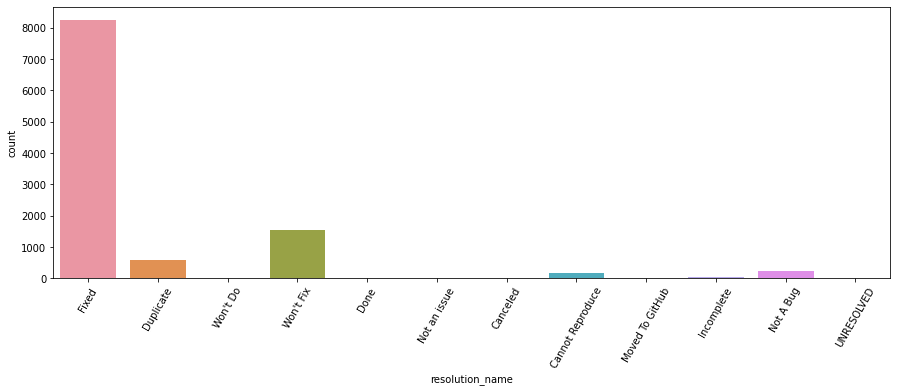

In [212]:
ax = sns.countplot(x="resolution_name", data=issues_df[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

### Watches

In [213]:
pp.pprint(issues_df.watches[0])

'<JIRA Watchers at 5060633888>'


### Priority

In [214]:
issues_df.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Blocker', 'Critical'], dtype=object)

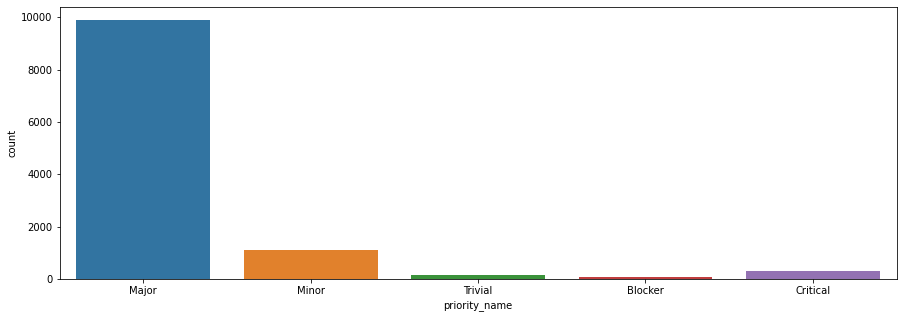

In [215]:
ax = sns.countplot(x="priority_name", data=issues_df[["issue_id", "priority_name"]])

### Labels

In [216]:
len(issues_labels.label.unique())

205

<AxesSubplot:xlabel='label'>

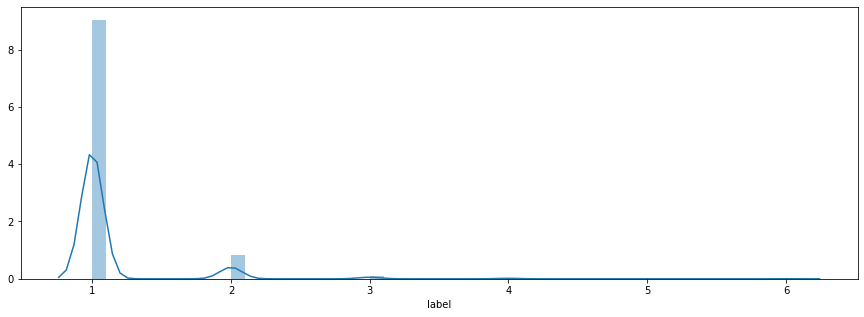

In [217]:
sns.distplot(issues_labels.groupby("issue_id").count().label)

### Versions

In [218]:
len(issues_versions.version_name.unique())

143

In [219]:
top_versions = issues_versions.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)
top_versions.head(10)

,version_name,issue_id
15,1.5,131
30,2.11,80
87,5.2,79
35,2.2,77
43,2.8,69
7,1.12,67
111,6.7,66
22,1.9.2,61
20,1.9,59
82,5.0,56


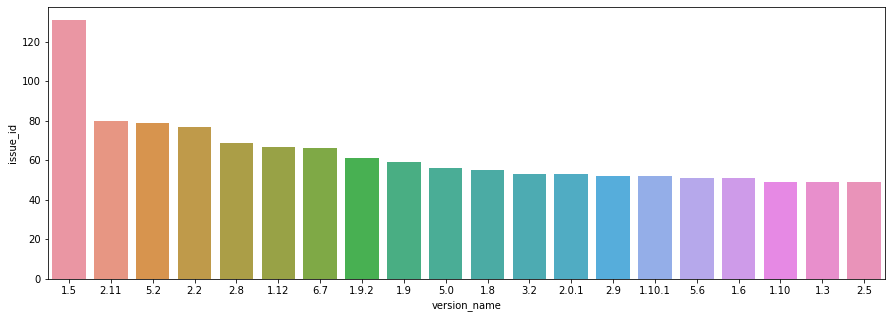

In [220]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(20))

### Status

In [221]:
issues_df.status.unique()

array(['Open', 'In Review', 'In Progress', 'Closed', 'To Do', 'Resolved',
       'Reopened'], dtype=object)

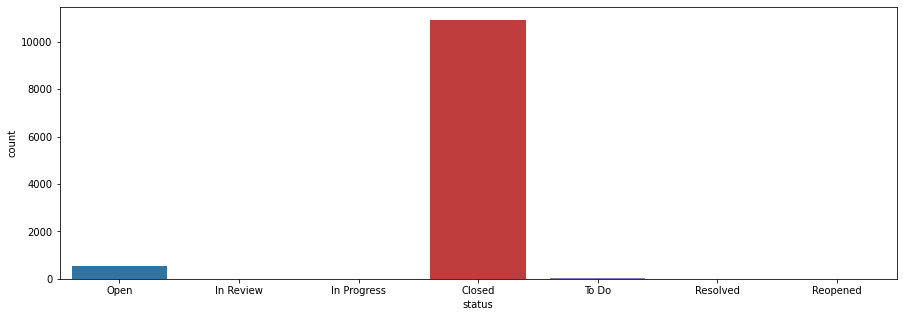

In [222]:
ax = sns.countplot(x="status", data=issues_df[["issue_id", "status"]])

### Created

In [240]:
issues_df.created.dt